# Install & import libraries

In [1]:
!pip install nltk pandas --quiet

import pandas as pd
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


# Load your cleaned comments

In [2]:
df = pd.read_csv('/content/telecom_comments_clean.csv')  # adjust path if needed
df.head()


,video_id,author,text,published_at,like_count,clean_text
0,a35pZ1rPXKM,@felixamoah4978,Her Opoku be fucking guy. I just like him,2025-07-22T19:22:27Z,0,opoku fucking guy like
1,a35pZ1rPXKM,@ON_THE_STREET-g7i,nkwasiafoc fix ur network aaba,2025-06-25T12:32:31Z,0,nkwasiafoc fix ur network aaba
2,a35pZ1rPXKM,@smokehimself,Nice🫰🏽,2025-06-19T10:36:48Z,0,nice
3,a35pZ1rPXKM,@Yourprettyangel,Niceeee,2025-06-19T08:54:26Z,0,niceeee
4,a35pZ1rPXKM,@batadelon,Nice one🎉🎉,2025-06-19T01:48:24Z,1,nice one


# Run VADER on each comment

In [5]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

def get_sentiment(text):
    # handle NaN or non-string
    if not isinstance(text, str):
        text = ""  # or str(text)
    score = sia.polarity_scores(text)['compound']
    if score > 0.05:
        return 'positive'
    elif score < -0.05:
        return 'negative'
    else:
        return 'neutral'

df['sentiment'] = df['clean_text'].apply(get_sentiment)


# Save the results

In [6]:
df.to_csv('/content/telecom_comments_sentiment.csv', index=False)
df['sentiment'].value_counts()


,count
sentiment,
positive,383
neutral,348
negative,124


# Visualise results

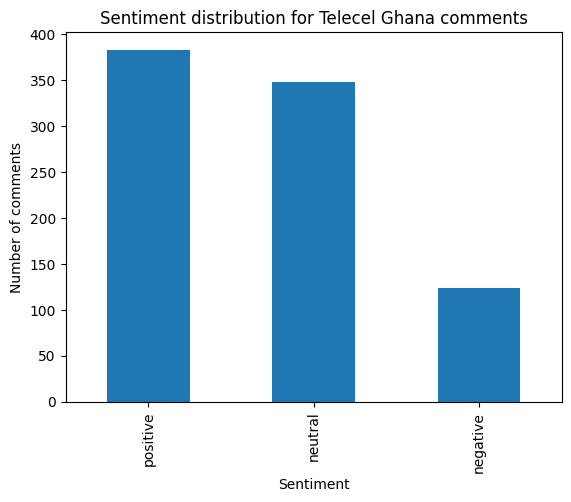

In [8]:
import matplotlib.pyplot as plt

df['sentiment'].value_counts().plot(kind='bar')
plt.title('Sentiment distribution for Telecel Ghana comments')
plt.xlabel('Sentiment')
plt.ylabel('Number of comments')
plt.show()
